# Useful resources

http://stackoverflow.com/questions/9401658/matplotlib-animating-a-scatter-plot

https://plot.ly/python/streaming-bubbles-tutorial/

https://jakevdp.github.io/blog/2012/08/18/matplotlib-animation-tutorial/

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
import pandas as pd
import seaborn as sns
import time

In [ ]:
np.set_printoptions(precision=2)

In [ ]:
df=pd.read_pickle('../datasets/df_userID.pickle')

### Small operations on the database

In [ ]:
df['Age']=df.RaceYear-df.Year

In [ ]:
df=df[df.Age>4]

In [ ]:
df=df[df.Age<100]

### Getting first race for each runner

In [ ]:
df['FirstGameYear']=df.RaceYear

In [ ]:
users_first_game_df=df.groupby(df.UserID)[['FirstGameYear']].apply(np.min)

In [ ]:
users_first_game_df.head()

In [ ]:
users_first_game_df.loc['0Berson Jose 1976.0'].FirstGameYear

In [ ]:
users_first_game_dict=dict(zip(users_first_game_df.index,users_first_game_df.FirstGameYear))

In [ ]:
users_first_game_dict['0Berson Jose 1976.0']

In [ ]:
df.FirstGameYear=df.UserID.apply(lambda x: users_first_game_dict[x])

In [ ]:
df.RaceYear.value_counts()

In [ ]:
df.FirstGameYear.value_counts()

### Getting last race for each runner

In [ ]:
df['LastRaceYear']=df.RaceYear

In [ ]:
users_last_game_df=df.groupby(df.UserID)[['LastRaceYear']].apply(np.max)

In [ ]:
users_last_game_dict=dict(zip(users_last_game_df.index,users_last_game_df.LastRaceYear))

In [ ]:
users_last_game_dict['0Berson Jose 1976.0']

In [ ]:
df.LastRaceYear=df.UserID.apply(lambda x: users_last_game_dict[x])

In [ ]:
df.RaceYear.value_counts()

In [ ]:
df.LastRaceYear.value_counts()

### LastRace - FirstRace analysis

In [ ]:
df['TotalYears']=df.LastRaceYear-df.FirstGameYear+1

In [ ]:
df.TotalYears.value_counts()

In [ ]:
df[df.TotalYears==4].FirstGameYear.value_counts()

### New entries in category

In [ ]:
df['NewEntry']=(df.FirstGameYear==df.RaceYear)

# Save data men

In [ ]:
np.save('Data/df_categories_age_size_men.npy',df_categories_age_size_avg)

In [ ]:
np.save('Data/np_paces_men.npy',np_paces_avg)

In [ ]:
np.save('Data/df_percentage_of_users_per_category_men.npy',df_percentage_of_users_per_category_avg)

In [ ]:
np.save('Data/races_per_year_men.npy',races_per_year_avg)

In [ ]:
np.save('Data/newcomers_men.npy',newcomers_avg)

# Save data women

In [ ]:
np.save('Data/df_categories_age_size_women.npy',df_categories_age_size_avg)

In [ ]:
np.save('Data/np_paces_women.npy',np_paces_avg)

In [ ]:
np.save('Data/df_percentage_of_users_per_category_women.npy',df_percentage_of_users_per_category_avg)

In [ ]:
np.save('Data/races_per_year_women.npy',races_per_year_avg)

In [ ]:
np.save('Data/newcomers_women.npy',newcomers_avg)

# Store and load df to save time

In [68]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
import pandas as pd
import seaborn as sns
import time

In [69]:
np.set_printoptions(precision=2)

In [70]:
df=pd.read_pickle('tempdf.pickle')

In [72]:
df.UserID.value_counts()

Nivola Gianpaolo 1966.0          178
Zuber Benno 1960.0               157
Gerwer Armin 1947.0              147
Meyer Dirk 1968.0                143
Triantafillou Christos 1968.0    142
Gilles Jean-Guy 1947.0           140
Mletzkowsky Manfred 1934.0       139
Vetter Raphael 1959.0            133
Binder Peter 1956.0              128
Abgottspon Medard 1942.0         126
Ummel Beat 1960.0                125
Jost Hansueli 1978.0             124
Liembd Kurt 1958.0               124
Leserf Gottlieb 1938.0           119
Calame Louis 1952.0              119
Scarcella Giovanni 1963.0        118
Ehrbar Jean-Luc 1957.0           117
Fritschi Johann 1937.0           116
Buzzi Andreas 1962.0             116
Senn Silvia 1959.0               115
Von Känel Christoph 1959.0       114
Guignard Roland 1957.0           113
Bader Renate 1970.0              112
Vogel Bruno 1959.0               112
Scheiber Kaspar 1939.0           112
Plüss Fritz 1965.0               111
Eichenberger Romain 1963.0       111
B

### Splitting in length categories

In [ ]:
categories=[0,5,10,15.5,25,43]

In [ ]:
df=df[df.Sex=='F']

In [ ]:
df_categories=[df[(df.Distance>=categories[i-1]) &(df.Distance<categories[i])] for i in range(1,len(categories))]

In [ ]:
[x.shape[0] for x in df_categories]

### Splitting in age category

In [ ]:
ages=list(range(4,81,1))

In [ ]:
df_categories_age=[[] for i in df_categories]

In [ ]:
ages_category=[]
for i in range(1, len(ages)):
    ages_category.append(df[(df.Age>ages[i-1]) &(df.Age<=ages[i])])

In [ ]:
for j in range(len(categories)-1):
    df_category=df_categories[j]
    df_categories_age[j]=[df_category[(df_category.Age>ages[i-1]) &(df_category.Age<=ages[i])] for i in range(1,len(ages))]

In [ ]:
df_categories_age_size=[[0 for i in range(len(df_categories_age[0]))] for i in range(len(df_categories_age))]

In [ ]:
for i in range(len(df_categories_age)):
    for j in range(len(df_categories_age[0])):
        df_categories_age_size[i][j]=df_categories_age[i][j].shape[0]
df_categories_age_size=np.array(df_categories_age_size)

In [ ]:
df_categories_age_size

In [ ]:
df_category_age_usercount=[[y.groupby(y.UserID).count().shape[0] for y in x] for x in df_categories_age]
df_age_usercount=[x.groupby(x.UserID).count().shape[0] for x in ages_category]

In [ ]:
df_age_usercount=np.array(df_age_usercount)

In [ ]:
df_category_age_usercount=np.array(df_category_age_usercount)
df_category_age_usercount

In [ ]:
df_percentage_of_users_per_category=df_category_age_usercount/df_age_usercount

### Runs per year

In [ ]:
df_categories_age_size

In [ ]:
df_races_per_category=[[len(set(race.UserID)) for race in cat] for cat in df_categories_age]
df_races_per_category=np.array(df_races_per_category)

In [ ]:
races_per_year=df_categories_age_size/df_races_per_category

In [ ]:
races_per_year

### Getting how many races a runner did

In [ ]:
df_percentage_of_users_per_category

In [ ]:
np.sum(df_percentage_of_users_per_category,axis=0)

In [ ]:
final_table=[[np.mean(y.groupby(y.UserID).count().Race) for y in x] for x in df_categories_age]

In [ ]:
np.array(final_table)

### Get percentage of newcomers in each field

In [ ]:
newcomers=[[sum(race.NewEntry) for race in cat] for cat in df_categories_age]
newcomers=np.array(newcomers)/df_categories_age_size

In [ ]:
newcomers

### Getting average pace per each category

In [ ]:
paces_matrix=[[0 for j in range(len(ages)-1)] for i in range(len(categories)-1)]

In [ ]:
for i in range(len(categories)-1):
    for j in range(len(ages)-1):
        paces_matrix[i][j]=np.mean(df_categories_age[i][j].Pace)

In [ ]:
np_paces_matrix=np.array(paces_matrix)

In [ ]:
np_paces=np.zeros(np_paces_matrix.shape)

In [ ]:
for i in range(np_paces_matrix.shape[0]):
    for j in range(np_paces_matrix.shape[1]):
        np_paces[i,j]=np_paces_matrix[i,j].total_seconds()

In [ ]:
def interpolate(matrix,interpolation=10):
    return_matrix=np.zeros([matrix.shape[0],(matrix.shape[1]-1)*interpolation+1])
    
    return_matrix[:,0]=matrix[:,0]
    starting_index=0
    for j in range(1,matrix.shape[1]):
        gradient=(matrix[:,j]-matrix[:,j-1])/interpolation
        for i in range(1,interpolation):
            return_matrix[:,starting_index+i]=return_matrix[:,starting_index]+i*gradient
        return_matrix[:,starting_index+interpolation]=matrix[:,j]
        starting_index+=interpolation
    return return_matrix

In [ ]:
def average(matrix,neighborhood=400):
    print(matrix.shape)
    return_list=[]
    if matrix.shape[1]<neighborhood:
        raise()
        
    start=0
    while start+neighborhood<=matrix.shape[1]:
        return_list.append(np.mean(matrix[:,start:start+neighborhood],axis=1))
#         print(return_list[0].shape)
        start+=1
    return_matrix=np.array(return_list)
    print(len(return_list))
    return_matrix=np.transpose(return_matrix)
    return return_matrix

In [ ]:
df_categories_age_size=interpolate(df_categories_age_size[:,1:])
df_categories_age_size=interpolate(df_categories_age_size[:,1:])

In [ ]:
np_paces=interpolate(np_paces[:,1:])
np_paces=interpolate(np_paces[:,1:])

In [ ]:
df_percentage_of_users_per_category=interpolate(df_percentage_of_users_per_category[:,1:])
df_percentage_of_users_per_category=interpolate(df_percentage_of_users_per_category[:,1:])

In [ ]:
races_per_year=interpolate(races_per_year[:,1:])
races_per_year=interpolate(races_per_year[:,1:])

In [ ]:
newcomers=interpolate(newcomers[:,1:])
newcomers=interpolate(newcomers[:,1:])

In [ ]:
df_categories_age_size_avg=average(df_categories_age_size)

In [ ]:
np_paces_avg=average(np_paces)

In [ ]:
df_percentage_of_users_per_category_avg=average(df_percentage_of_users_per_category)

In [ ]:
races_per_year_avg=average(races_per_year)

In [ ]:
newcomers_avg=average(newcomers)

In [ ]:
df_percentage_of_users_per_category.shape

In [ ]:
df_categories_age_size.shape

In [ ]:
np_paces.shape

In [ ]:
races_per_year.shape

In [ ]:
newcomers.shape

In [ ]:
ages_interpolate=np.linspace(4,81,df_categories_age_size_avg.shape[1])

In [ ]:
ages_interpolate

In [ ]:
distances_list=['<5km','5km','10km','21.0975km','42.195km']

In [ ]:
correct_orientation=True

# Animation from 0

In [1]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
import pandas as pd
import seaborn as sns
import time

### Load data 

In [2]:
df_categories_age_size_men=np.load('Data/df_categories_age_size_men.npy')

In [3]:
np_paces_men=np.load('Data/np_paces_men.npy')

In [4]:
df_percentage_of_users_per_category_men=np.load('Data/df_percentage_of_users_per_category_men.npy')

In [5]:
races_per_year_men=np.load('Data/races_per_year_men.npy')

In [6]:
newcomers_men=np.load('Data/newcomers_men.npy')

In [7]:
df_categories_age_size_women=np.load('Data/df_categories_age_size_women.npy')

In [8]:
np_paces_women=np.load('Data/np_paces_women.npy')

In [9]:
df_percentage_of_users_per_category_women=np.load('Data/df_percentage_of_users_per_category_women.npy')

In [10]:
races_per_year_women=np.load('Data/races_per_year_women.npy')

In [11]:
newcomers_women=np.load('Data/newcomers_women.npy')

In [12]:
ages_interpolate=np.linspace(4,81,df_categories_age_size_men.shape[1])

In [13]:
distances_list=['<5km','5-9km','10-15km','16-28km','29-45km']

In [14]:
first_not_nan_men=np.zeros(5)
first_not_nan_women=np.zeros(5)

In [15]:
for i in range(newcomers_men.shape[0]):
    line_men=newcomers_men[i,:]
    for j,x in enumerate(line_men):
        if not np.isnan(x):
            first_not_nan_men[i]=j
            break
            
    line_women=newcomers_women[i,:]
    for j,x in enumerate(line_women):
        if not np.isnan(x):
            first_not_nan_women[i]=j
            break

In [16]:
first_not_nan_men

array([   0.,    0.,  290.,   90.,  690.])

In [17]:
first_not_nan_women

array([   0.,    0.,  290.,    0.,  690.])

### Animation

In [18]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np

In [19]:
from matplotlib import rc
rc('animation', html='html5')

In [20]:
validIndices = ~np.isnan(newcomers_women[1,:])

In [21]:
validIndices

array([ True,  True,  True, ...,  True,  True,  True], dtype=bool)

In [22]:
newcomers_women[:,2]

array([ 0.55914971,  0.43103867,         nan,  0.63300582,         nan])

In [23]:
df_categories_age_size_men

array([[  2.39473227e+04,   2.39768973e+04,   2.40061570e+04, ...,
          4.65140000e+00,   4.63375000e+00,   4.61625000e+00],
       [  4.95693750e+01,   5.00181250e+01,   5.04707500e+01, ...,
          8.78607000e+01,   8.76200000e+01,   8.73800000e+01],
       [  6.95775000e+00,   7.03725000e+00,   7.11770000e+00, ...,
          1.00383325e+02,   1.00043750e+02,   9.97062500e+01],
       [  1.53120000e+01,   1.53980000e+01,   1.54841000e+01, ...,
          4.19980000e+01,   4.18325000e+01,   4.16675000e+01],
       [  2.25000000e-03,   2.75000000e-03,   3.30000000e-03, ...,
          1.14539000e+01,   1.14012500e+01,   1.13487500e+01]])

In [24]:
df_categories_age_size_women=df_categories_age_size_women-df_categories_age_size_men

In [25]:
df_categories_age_size_women

array([[  5.78476650e+03,   5.79455350e+03,   5.80431470e+03, ...,
          2.87890000e+00,   2.87625000e+00,   2.87375000e+00],
       [  1.85197500e+01,   1.86852500e+01,   1.88518000e+01, ...,
          2.18326500e+01,   2.17775000e+01,   2.17225000e+01],
       [  2.58875000e+00,   2.61125000e+00,   2.63375000e+00, ...,
          1.76511750e+01,   1.76337500e+01,   1.76162500e+01],
       [  3.55750000e-01,   3.54250000e-01,   3.52850000e-01, ...,
          5.25002500e+00,   5.25000000e+00,   5.25000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          3.78725000e-01,   3.76250000e-01,   3.73750000e-01]])

In [26]:
class AnimatedScatter(object):
    """An animated scatter plot using matplotlib.animations.FuncAnimation."""
    def __init__(self, numpoints=50):
        self.numpoints = numpoints
        self.stream = self.data_stream()

        self.fig = plt.figure()

        self.fig.patch.set_facecolor('blue')
        self.fig.patch.set_alpha(0.7)

            
        # Setup the figure and axes...
        self.ax = self.fig.add_subplot(111)
        self.run_annotations=[]
        
        # xlabels and xticks
        plt.xlabel('Percentage of new runners',alpha=0.5,weight='bold',size=16,fontname='Helvetica',color='blue')
        plt.xticks(alpha=0.5,weight='bold',size=10,fontname='Helvetica',color='blue')
        
        # ylabels and yticks
        plt.ylabel('Pace (sec/km)',alpha=0.5,weight='bold',size=16,fontname='Helvetica',color='blue')        
        plt.yticks(alpha=0.5,weight='bold',size=10,fontname='Helvetica',color='blue')
        
        # Title
        plt.title('Datasport',alpha=0.5,weight='bold',size=25,fontname='Helvetica',color='blue',y=1.02)

        plt.grid(color='blue',alpha=0.1)
        self.ax.patch.set_facecolor('blue')
        self.ax.patch.set_alpha(0.0)
        
        
        self.scatter_men=plt.scatter([],[],s=[])
        self.scatter_women=plt.scatter([],[],s=[])

        
        # Explication
        self.tl=self.ax.annotate('',(0.1,470))
        self.bl=self.ax.annotate('',(0.1,470))
        self.br=self.ax.annotate('',(0.1,470))
        self.tr=self.ax.annotate('',(0.1,470))

        
        # Then setup FuncAnimation.
#         self.ani = animation.FuncAnimation(self.fig, self.update, interval=5, 
#                                            init_func=self.setup_plot, blit=True,
#                                           frames=1500,repeat=False)

    def setup_plot(self):
        """Initial drawing of the scatter plot."""
#         x, y, s, i,c = next(self.stream)
#         self.scat = self.ax.scatter(x, y, s=s, animated=True)
        self.scat = self.ax.scatter([], [], s=[], animated=True)
        self.scat_women = self.ax.scatter([], [], s=[], animated=True)
        
        self.ax.axis([0.01, 0.999, 201,549])
#         self.annotation=self.ax.annotate(4,(0.8,450),alpha=0.5,weight='bold',size=60,fontname='Helvetica',color='blue')
#         self.ax.annotate(5,(0.8,450),alpha=0.5,weight='bold',size=60,fontname='Helvetica',color='blue')

        # For FuncAnimation's sake, we need to return the artist we'll be using
        # Note that it expects a sequence of artists, thus the trailing comma.
        return self.scat,

    def data_stream(self):
        """Generate a random walk (brownian motion). Data is scaled to produce
        a soft "flickering" effect."""
            
        x_men=newcomers_men
        data_men=np_paces_men
        size_men=df_categories_age_size_men
        size_men=size_men**(2/3)*2
        
        x_women=newcomers_women
        data_women=np_paces_women
        size_women=df_categories_age_size_women
        size_women=size_women**(2/3)*2
        
        age=ages_interpolate
        
#         for i in range(100):
#             yield 0
        print(data_men.shape[1])
        for i in range(0,data_men.shape[1]):
            if i%100==0:
                print(i)
#             if not correct_orientation:
#                 yield x[:,i],data[:,i],size[:,i],i,age[i]
#             else:                
            yield x_men[:,i],data_men[:,i],size_men[:,i],x_women[:,i],data_women[:,i],size_women[:,i],i,age[i]


    def plot_top_left(self,i,end,duration_animation=20):
        if i<0 or i>=end:
            return
        try:
            self.tl.remove()
        except:
            pass
        factor=np.min([1,i/duration_animation,(end-i)/duration_animation])
        self.tl=self.ax.annotate('Experienced \n   and slow',(0.1,470),alpha=0.5*factor,weight='bold',size=20,fontname='Helvetica',color='blue')
    
    def plot_top_right(self,i,end,duration_animation=20):
        if i<0 or i>=end:
            return
        try:
            self.tr.remove()
        except:
            pass
        factor=np.min([1,i/duration_animation,(end-i)/duration_animation])
        self.tr=self.ax.annotate('   New and \nslow runners',(0.67,470),alpha=0.5*factor,weight='bold',size=20,fontname='Helvetica',color='blue')

    
    def plot_bottom_right(self,i,end,duration_animation=20):
        if i<0 or i>=end:
            return
        try:
            self.br.remove()
        except:
            pass
        factor=np.min([1,i/duration_animation,(end-i)/duration_animation])
        self.br=self.ax.annotate('   New \nand fast',(0.73,240),alpha=0.5*factor,weight='bold',size=20,fontname='Helvetica',color='blue')

    
    def plot_bottom_left(self,i,end,duration_animation=20):
        if i<0 or i>=end:
            return
        try:
            self.bl.remove()
        except:
            pass
        factor=np.min([1,i/duration_animation,(end-i)/duration_animation])
        self.bl=self.ax.annotate('Experienced \n   and fast',(0.1,240),alpha=0.5*factor,weight='bold',size=20,fontname='Helvetica',color='blue')

    def plot_age(self,i,duration_animation=20):
        if i<0:
            return
        try:
            self.age_displayed.remove()
        except:
            pass
        
        factor=np.min([1,i/duration_animation])
        self.age_displayed=self.ax.annotate('4',(0.75,470),alpha=0.5*factor,weight='bold',size=60,fontname='Helvetica',color='blue')
    
    def plot_word_age(self,i,end,duration_animation=20):
        if i<0 or i>=end:
            return
        try: 
            self.age_word.remove()
        except:
            pass
        factor=np.min([1,i/duration_animation,(end-i)/duration_animation])
        self.age_word=self.ax.annotate('Age of the \n runner',(0.7,400),alpha=0.5*factor,weight='bold',size=20,fontname='Helvetica',color='blue')

    def plot_sphere_explication(self,i,middle,end,duration_animation=20):
        if i<0 or i>=end:
            return
        try: 
            self.sphere.remove()
        except:
            pass
        try:
            self.sphere_explication1.remove()
        except:
            pass
        try:
            self.sphere_explication2.remove()
            self.lineup.remove()
            self.linedown.remove()
            self.linecross.remove()
        except:
            pass
        factor_sphere=np.min([1,i/duration_animation,(end-i)/duration_animation])
        self.sphere=plt.scatter([0.4],[320],s=[1000],c=['#3377FF'],alpha=0.8*factor_sphere)
        
        if i>=0 and i<=middle:
            factor1=np.min([1,i/duration_animation,(middle-i)/duration_animation])
            self.sphere_explication1=self.ax.annotate('Race',(0.47,315),alpha=0.5*factor1,weight='bold',size=20,fontname='Helvetica',color='blue')
        if i>=middle and i<end:
            factor2=np.min([1,(i-middle)/duration_animation,(end-i)/duration_animation])
            self.sphere_explication2=self.ax.annotate('Size = Number of \n runners',(0.47,300),alpha=0.5*factor2,weight='bold',size=20,fontname='Helvetica',color='blue')

    def plot_balls_legend(self,i,end,duration_animation=20):
        if i<0 or i>=end:
            return
        
        try: 
            self.sphere_legend.remove()
        except:
            pass
        try: 
            self.sphere_legend_men.remove()
        except:
            pass
        try: 
            self.sphere_legend_women.remove()
        except:
            pass
        try: 
            self.sphere_legend_less5.remove()
        except:
            pass
        try: 
            self.sphere_legend_5.remove()
        except:
            pass
        try: 
            self.sphere_legend_10.remove()
        except:
            pass
        try: 
            self.sphere_legend_21.remove()
        except:
            pass
        try: 
            self.sphere_legend_42.remove()
        except:
            pass
        
        factor=np.min([1,i/duration_animation,(end-i)/duration_animation])
        
        coord_x=[0.1,0.23,0.36,0.49,0.62,0.1,0.23,0.36,0.49,0.62]
        coord_y=[400,400,400,400,400,325,325,325,325,325]
        colors_old=['#00ff99','#00CCCC','#3377FF','#3333BB','#333366','#FFCCDD','#FF99AA','#FF44DD','#CC11EE','#CC1199']
        colors=['#bbdefb','#64b5f6','#2196f3','#1976d2','#0d47a1','#ff99ff','#ff66ff','#ff33ff','#cc33cc','#990099']
        self.sphere_legend=plt.scatter(coord_x,coord_y,s=[300],c=colors,alpha=0.8*factor)
        
        self.sphere_legend_men=self.ax.annotate('Men',(0.68,390),alpha=0.5*factor,weight='bold',size=20,fontname='Helvetica',color='blue')
        self.sphere_legend_women=self.ax.annotate('Women',(0.68,315),alpha=0.5*factor,weight='bold',size=20,fontname='Helvetica',color='blue')
        self.sphere_legend_less5=self.ax.annotate('<5km',(0.1-0.05,430),alpha=0.5*factor,weight='bold',size=15,fontname='Helvetica',color='blue')
        self.sphere_legend_5=self.ax.annotate('5-9\nkm',(0.23-0.025,430),alpha=0.5*factor,weight='bold',size=15,fontname='Helvetica',color='blue')
        self.sphere_legend_10=self.ax.annotate('10-15\n  km',(0.36-0.05,430),alpha=0.5*factor,weight='bold',size=15,fontname='Helvetica',color='blue')
        self.sphere_legend_21=self.ax.annotate('16-28\n  km',(0.49-0.05,430),alpha=0.5*factor,weight='bold',size=15,fontname='Helvetica',color='blue')
        self.sphere_legend_42=self.ax.annotate('29-45\n  km',(0.62-0.05,430),alpha=0.5*factor,weight='bold',size=15,fontname='Helvetica',color='blue')

            
    def explication(self,i):
        self.plot_top_right(i,1000)
        self.plot_bottom_right(i-250,750)
        self.plot_bottom_left(i-500,500)
        self.plot_top_left(i-750,250)
    
    def update(self, i):
        """Update the scatter plot."""
        if i<100:
            return self.scat,
        if i>=100 and i<=1100:
            if i%100==0:
                print(i)
            self.explication(i-100)
            return self.scat,
        try:
            self.tl.remove()
            self.tr.remove()
            self.bl.remove()
            self.br.remove()
        except:
            pass
        if i>=1100 and i<=1800:
            self.plot_sphere_explication(i-1100,250,500)
            return self.scat,
        try: 
            self.sphere.remove()
        except:
            pass
        try:
            self.sphere_explication1.remove()
        except:
            pass
        try:
            self.sphere_explication2.remove()
            self.lineup.remove()
            self.linedown.remove()
            self.linecross.remove()
        except:
            pass
        
        if i>=1800 and i<=2400:
            self.plot_balls_legend(i-1900,2400)
            return self.scat,
        try:
            self.sphere_legend.remove()
            self.sphere_legend_men.remove()
            self.sphere_legend_women.remove()
            self.sphere_legend_less5.remove()
            self.sphere_legend_5.remove()
            self.sphere_legend_10.remove()
            self.sphere_legend_21.remove()
            self.sphere_legend_42.remove()
        except:
            pass
        if i>=2400 and i<=2800:
            self.plot_age(i-2400,250)
            self.plot_word_age(i-2500,150)
            return self.scat,
        try:
            self.age_word.remove()
        except:
            pass
        
        
        x_men,y_men,s_men,x_women,y_women,s_women,i,age = next(self.stream)
        # Set x and y data...
#         graph_men=np.column_stack((x_men,y_men))
#         self.scat.set_offsets(graph_men)
        
#         graph_women=np.column_stack((x_women,y_women))
#         self.scat_women.set_offsets(graph_women)
        old_colors_men=['#00ff99','#00CCCC','#3377FF','#3333BB','#333366']
        colors_men=['#bbdefb','#64b5f6','#2196f3','#1976d2','#0d47a1']
        self.scatter_men.remove()
        self.scatter_men=plt.scatter(x_men,y_men,s=s_men,c=colors_men)
        
        old_colors_women=['#FFCCDD','#FF99AA','#FF44DD','#CC11EE','#CC1199']
        colors_women=['#ff99ff','#ff66ff','#ff33ff','#cc33cc','#990099']
        self.scatter_women.remove()
        self.scatter_women=plt.scatter(x_women,y_women,s=s_women,c=colors_women)
        
        # We need to return the updated artist for FuncAnimation to draw..
        # Note that it expects a sequence of artists, thus the trailing comma.
        ann=[]
        ann.append(self.scat)
        ann.append(self.scat_women)

        # Annotation of the run
        for j in self.run_annotations:
            j.remove()
        self.run_annotations=[]
        
        for j in range(len(x_men)):
            first=first_not_nan_men[j]
            if i-first<300:
                self.run_annotations.append(plt.annotate('Men '+distances_list[j],(x_men[j]+0.03,y_men[j]+5),weight='bold',fontname='Helvetica',color=colors_men[j],alpha=0.8))
            if i-first>=300 and i-first<500:
                discount=(500-i+first)/300
                self.run_annotations.append(plt.annotate('Men '+distances_list[j],(x_men[j]+0.03,y_men[j]+5),weight='bold',fontname='Helvetica',color=colors_men[j],alpha=0.8*discount))
            first=first_not_nan_women[j]
            if i-first<300:
                self.run_annotations.append(plt.annotate('Women '+distances_list[j],(x_women[j]+0.03,y_women[j]-15),weight='bold',fontname='Helvetica',color=colors_women[j],alpha=0.8))
            if i-first>=300 and i-first<500:
                discount=(500-i+first)/300
                self.run_annotations.append(plt.annotate('Women '+distances_list[j],(x_women[j]+0.03,y_women[j]-15),weight='bold',fontname='Helvetica',color=colors_women[j],alpha=0.8*discount))
        # Age displayed 
        try:
            self.age_displayed.remove()
        except:
            pass
        self.age_displayed=self.ax.annotate(int(age),(0.75,470),alpha=0.5,weight='bold',size=60,fontname='Helvetica',color='blue')
        
        self.fig.patch.set_facecolor('blue')
        self.fig.patch.set_alpha(0.7)
        
        return ann

    def show(self):
        plt.show()

In [ ]:
a=AnimatedScatter()


In [66]:
?plt.arrow()

In [64]:
plt.axis([-1,2,-1,2])
a=plt.arrow(0, 0, 1, 1, edgecolor='white', width=0.05,head_width=0.2,alpha=0.4)
a.set_facecolor('b')

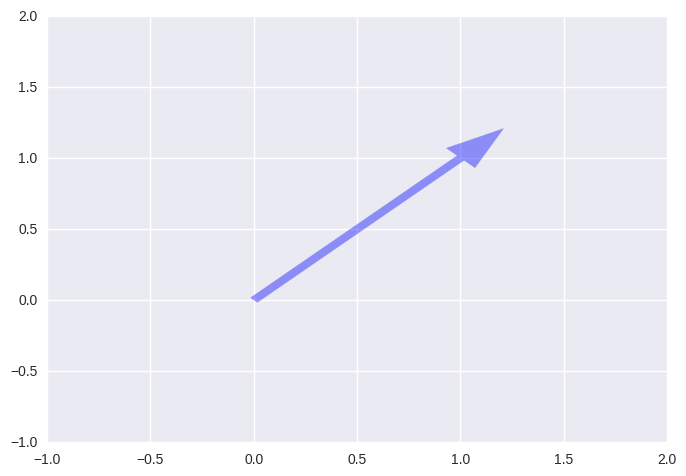

In [65]:
plt.show()

In [ ]:
animation.FuncAnimation(a.fig, a.update, interval=12, 
                                           init_func=a.setup_plot, blit=True,
                                          frames=9780,repeat=False)                                          
# frames=9780,repeat=False)

100
200
300
400


In [ ]:
plt.show()

## New animation

In [ ]:
def data_stream():
        """Generate a random walk (brownian motion). Data is scaled to produce
        a soft "flickering" effect."""
        x=newcomers
        data=np_paces
        size=df_categories_age_size
        size=np.sqrt(size)*10
        age=ages_interpolate
        
#         for i in range(100):
#             yield 0
        
        for i in range(1,data.shape[1]):
            if not correct_orientation:
                yield x[:,i],data[:,i],size[:,i],i,age[i]
            else:                
                yield data[:,i],x[:,i],size[:,i],i,age[i]

In [ ]:
a=data_stream()
next(a)

In [ ]:
del scat

In [ ]:
# fig = plt.figure()
# ax = plt.axes(xlim=(0, 2), ylim=(-2, 2))
# line, = ax.plot([], [], lw=2)


# Setup the figure and axes...
fig, ax = plt.subplots()

ds=data_stream()
# scat=0

# initialization function: plot the background of each frame
def init():
    """Initial drawing of the scatter plot."""
        
    x,y,s,time_step,age = next(ds)
    y = [r for r in y]
    x = [i for i in x]
    c = 1
    scat = ax.scatter(x, y, s=s, animated=True)
    ax.axis([0, 1.1, 250, 550])
    if correct_orientation:
        ax.axis([250,550,0, 1.1])
        
    return scat,

# animation function.  This is called sequentially
def animate(i):
    """Update the scatter plot."""

#     try:
    x,y,s,time_step,age = next(ds)
#     except:
#         return scat
    y = [r for r in y]
    x = [i for i in x]
#         s = [1000 for i in y]
    c = 1
#         print(y)
#         print(s)
    scat = ax.scatter(x, y, s=s, animated=True)

    graph=np.row_stack((y,x))
    # Set x and y data...
    scat.set_offsets(graph)
    # Set sizes...
    scat._sizes = s# 300 * abs(data[2])**1.5 + 100

    
#     x = np.linspace(0, 2, 1000)
#     y = np.sin(2 * np.pi * (x - 0.01 * i))
#     line.set_data(x, y)
#     return line,

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=200, interval=20, blit=True)

# save the animation as an mp4.  This requires ffmpeg or mencoder to be
# installed.  The extra_args ensure that the x264 codec is used, so that
# the video can be embedded in html5.  You may need to adjust this for
# your system: for more information, see
# http://matplotlib.sourceforge.net/api/animation_api.html
anim.save('basic_animation.mp4', fps=30, extra_args=['-vcodec', 'libx264'])

plt.show()

## Old animation

In [ ]:
class AnimatedScatter(object):
    """An animated scatter plot using matplotlib.animations.FuncAnimation."""
    def __init__(self, numpoints=50):
        self.numpoints = numpoints
        self.stream = self.data_stream()

        # Setup the figure and axes...
        self.fig, self.ax = plt.subplots()
        # Then setup FuncAnimation.
        self.ani = animation.FuncAnimation(self.fig, self.update, interval=15, 
                                           init_func=self.setup_plot, blit=True,frames=1000,repeat=False)
        self.ani.save('basic_animation.mp4', fps=30, extra_args=['-vcodec', 'libx264'])


    def setup_plot(self):
        """Initial drawing of the scatter plot."""
        
        x,y,s,time_step,age = next(self.stream)
        y = [r for r in y]
        x = [i for i in x]
#         s = [1000 for i in y]
        c = 1
#         plt.annotate('ciao',(0.4,300))
#         print(y)
#         print(s)
        self.scat = self.ax.scatter(x, y, s=s, animated=True)
        self.ax.axis([0, 1.1, 250, 550])
        if correct_orientation:
            self.ax.axis([250,550,0, 1.1])
        # For FuncAnimation's sake, we need to return the artist we'll be using
        # Note that it expects a sequence of artists, thus the trailing comma.
        return self.scat,

    def data_stream(self):
        """Generate a random walk (brownian motion). Data is scaled to produce
        a soft "flickering" effect."""
        x=newcomers
        data=np_paces
        size=df_categories_age_size
        size=np.sqrt(size)*10
        age=ages_interpolate
        
#         for i in range(100):
#             yield 0
        
        for i in range(1,data.shape[1]):
            if not correct_orientation:
                yield x[:,i],data[:,i],size[:,i],i,age[i]
            else:                
                yield data[:,i],x[:,i],size[:,i],i,age[i]

                
        #         data = np.random.random((4, self.numpoints))
#         xy = data[:2, :]
#         s, c = data[2:, :]
#         xy -= 0.5
#         xy *= 10
#         for i in range(1000):
#             xy += 0.03 * (np.random.random((2, self.numpoints)) - 0.5)
#             s += 0.05 * (np.random.random(self.numpoints) - 0.5)
#             c += 0.02 * (np.random.random(self.numpoints) - 0.5)
#             yield data

    def update(self, i):
        """Update the scatter plot."""

        try:
            x,y,s,time_step,age = next(self.stream)
        except:
            return self.scat
        y = [r for r in y]
        x = [i for i in x]
#         s = [1000 for i in y]
        c = 1
#         print(y)
#         print(s)
        graph=np.row_stack((y,x))
        # Set x and y data...
        self.scat.set_offsets(graph)
        # Set sizes...
        self.scat._sizes = s# 300 * abs(data[2])**1.5 + 100

        # Set colors..
#         self.scat.set_array(data[3])
        ann=[]
        self.scat =self.ax.scatter(x, y, s=s, animated=True)
        ann.append(self.scat)
        for i in range(len(x)):
            if not correct_orientation:
                ann.append(plt.annotate(distances_list[i],(x[i]+0.03,y[i]+5),weight='bold',fontname='Helvetica',color='red'))
            else:
                ann.append(plt.annotate(distances_list[i],(x[i]+5,y[i]+0.03),weight='bold',fontname='Helvetica',color='red'))
        if not correct_orientation:
            ann.append(plt.annotate(int(age),(0.8,450),alpha=0.5,weight='bold',size=60,fontname='Helvetica',color='blue'))
        else:
            ann.append(plt.annotate(int(age),(450,0.8),alpha=0.5,weight='bold',size=60,fontname='Helvetica',color='blue'))

#         self.ax.invert_yaxis()

        # We need to return the updated artist for FuncAnimation to draw..
        # Note that it expects a sequence of artists, thus the trailing comma.
        return ann

    def show(self):
        plt.show()



In [ ]:
firstTime=True
a = AnimatedScatter()

# a.show()